# Objective  - Is to predict the Delivery time using Sorting time

### Importing necessary libraries in Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import time
print("Libraries importing is sucessful")

Libraries importing is sucessful


In [2]:
st = time.time()

### Loading the dataset

In [3]:
def load_dataset():
    try:
        data = pd.read_csv("D:/Top Mentor_Data analytics class/Delivery_prj1/delivery_time.csv")
        print("Data loading is sucessful")
        return (data)
    except Exception as e:
        print(e)

In [4]:
data = load_dataset()

Data loading is sucessful


### Data profiling

In [5]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [7]:
data.shape

(21, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
data.duplicated().sum()

0

### Exploratory Data analysis

#### Summary statistics

In [11]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#### Visualisations

##### Distribution of Delivery time

<Figure size 400x400 with 0 Axes>

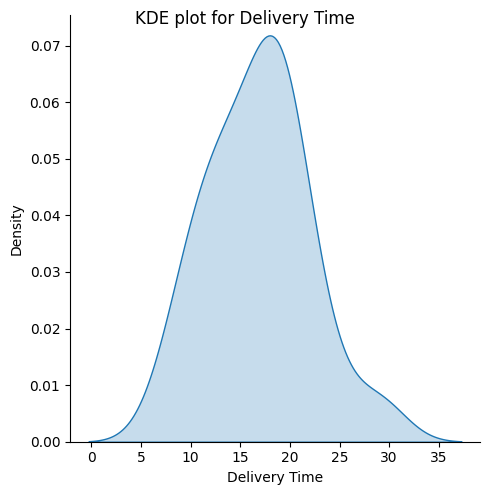

In [12]:
plt.figure(figsize = (4,4))
ax = sns.displot(data = data, x = 'Delivery Time', kind = 'kde', fill = True)
ax.fig.suptitle("KDE plot for Delivery Time")
plt.savefig("D:/Top Mentor_Data analytics class/Delivery_prj1/KDE_Delivery Time")
plt.show()

##### Distribution of sorting Time

<Figure size 400x400 with 0 Axes>

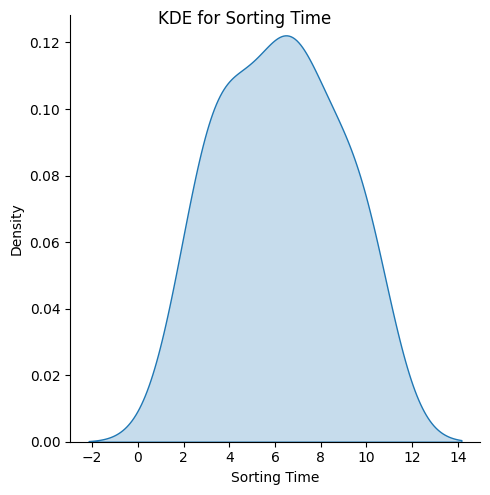

In [13]:
plt.figure(figsize = (4,4))
ax = sns.displot(data = data, x = 'Sorting Time', kind = 'kde', fill = True)
ax.fig.suptitle("KDE for Sorting Time")
plt.savefig("D:/Top Mentor_Data analytics class/Delivery_prj1/KDE_Sorting Time")
plt.show()

##### Scatter plot between Delivery Time and Sorting Time

<Figure size 600x400 with 0 Axes>

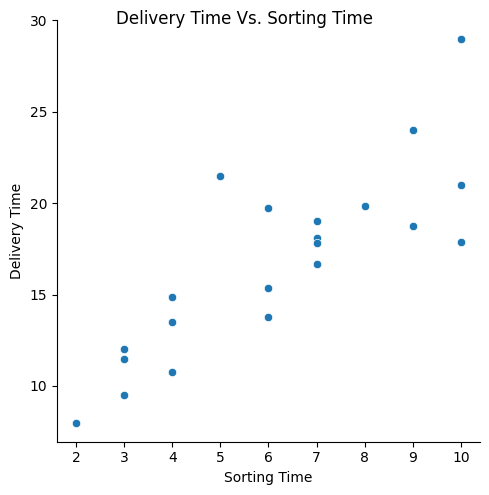

In [14]:
plt.figure(figsize = (6,4))
ax = sns.relplot(data = data, x = 'Sorting Time', y = 'Delivery Time')
ax.fig.suptitle("Delivery Time Vs. Sorting Time")
plt.savefig("D:/Top Mentor_Data analytics class/Delivery_prj1/Scatter plot")
plt.show()

### Linear Regression Model

#### Target and feature

In [34]:
X = np.log (data ['Sorting Time'].values.reshape(-1,1))
y = np.log(data ['Delivery Time'].values.reshape(-1,1))

In [35]:
X

array([[2.30258509],
       [1.38629436],
       [1.79175947],
       [2.19722458],
       [2.30258509],
       [1.79175947],
       [1.94591015],
       [1.09861229],
       [2.30258509],
       [2.19722458],
       [2.07944154],
       [1.38629436],
       [1.94591015],
       [1.09861229],
       [1.09861229],
       [1.38629436],
       [1.79175947],
       [1.94591015],
       [0.69314718],
       [1.94591015],
       [1.60943791]])

In [36]:
y

array([[3.04452244],
       [2.60268969],
       [2.98315349],
       [3.17805383],
       [3.36729583],
       [2.73111547],
       [2.94443898],
       [2.2512918 ],
       [2.88480071],
       [2.93119375],
       [2.98719594],
       [2.37490575],
       [2.8142104 ],
       [2.44234704],
       [2.48740353],
       [2.70001803],
       [2.62103882],
       [2.89646427],
       [2.07944154],
       [2.88088243],
       [3.06805294]])

#### Data splitting

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 1234)

In [38]:
X_train.shape

(12, 1)

In [39]:
X_test.shape

(9, 1)

In [40]:
y_train.shape

(12, 1)

In [41]:
y_test.shape

(9, 1)

In [42]:
y_test

array([[3.17805383],
       [2.44234704],
       [2.98315349],
       [2.62103882],
       [2.48740353],
       [2.73111547],
       [3.36729583],
       [3.04452244],
       [2.88480071]])

#### Model development and training

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
coefficient = lr.coef_
intercept = lr.intercept_

In [46]:
coefficient

array([[0.62231754]])

In [47]:
intercept

array([1.69338953])

In [48]:
predict = lr.predict(X_test)
final_score  = r2_score(y_test,predict)

In [49]:
predict

array([[3.06076093],
       [2.37707523],
       [2.80843288],
       [2.80843288],
       [2.37707523],
       [2.80843288],
       [3.12632863],
       [3.12632863],
       [3.12632863]])

In [50]:
print (f'The R2 score value of the Model is: {final_score:.2f}')

mse = mean_squared_error(y_test,predict)
print (f'The MSE of the model is : {mse:.2f}')

rmse = np.sqrt(mse)
print (f'The RMSE of the model is : {rmse:.2f}')

The R2 score value of the Model is: 0.72
The MSE of the model is : 0.02
The RMSE of the model is : 0.16


In [51]:
en = time.time()

print("The total time taken in seconds - ", (en - st))

The total time taken in seconds -  89.05349349975586


In [52]:
user_input = float(input("Enter the Sorting Time: "))
y = np.exp(intercept) + np.exp(coefficient) *user_input 
print("The predicted delivery time is: ", y)

Enter the Sorting Time: 5.67
The predicted delivery time is:  [[16.00245888]]
